In [1]:
import sys
sys.path.append('/opt/ctpn/CTPN/tools/')
sys.path.append('/opt/ctpn/CTPN/src/')
from cfg import Config as cfg
from other import draw_boxes, resize_im, CaffeModel
import cv2, os, caffe, sys
from detectors import TextProposalDetector, TextDetector
import os.path as osp
from utils.timer import Timer
from IPython.core.display import Image, display


DEMO_IMAGE_DIR="demo_images/"
NET_DEF_FILE="/opt/ctpn/CTPN/models/deploy.prototxt"
MODEL_FILE="/opt/ctpn/CTPN/models/ctpn_trained_model.caffemodel"

if False: # Set this to true for CPU only mode
    caffe.set_mode_cpu()
else:
    caffe.set_mode_gpu()
    caffe.set_device(cfg.TEST_GPU_ID)

text_proposals_detector=TextProposalDetector(CaffeModel(NET_DEF_FILE, MODEL_FILE))
text_detector=TextDetector(text_proposals_detector)

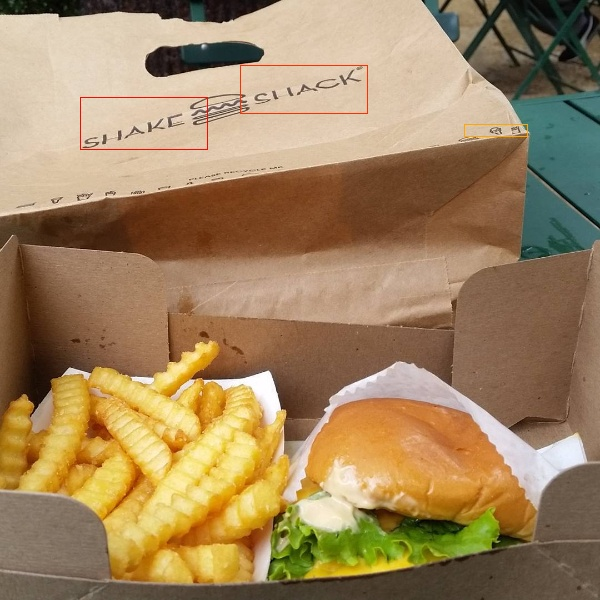

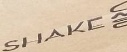

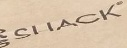

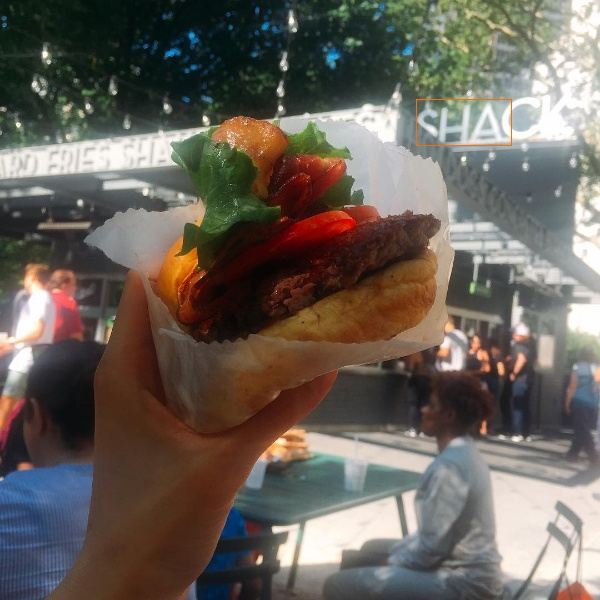

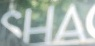

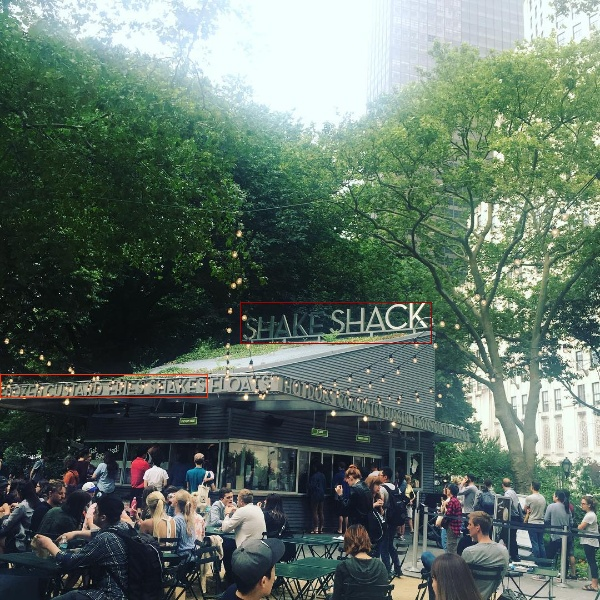

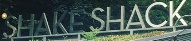

In [2]:
from glob import glob
timer=Timer()
try:
    os.mkdir('boxes')
except:
    pass
box_count = 0
for im_name in glob("images/*.jpg"):
    im_file=osp.join(im_name)
    im=cv2.imread(im_file)
    timer.tic()
    im, f=resize_im(im, cfg.SCALE, cfg.MAX_SCALE)
    text_lines=text_detector.detect(im)        
    im_with_text_lines=draw_boxes(im, text_lines, caption=im_name, is_display=False)
    cv2.imwrite('out.jpg',im_with_text_lines)
    display(Image('out.jpg'))
    for k in text_lines:
        top,left,bottom,right,score = k 
        crop_img = im[int(left):int(right),int(top):int(bottom)]
        cv2.imwrite('boxes/box_{}.jpg'.format(box_count),crop_img)
        display(Image('boxes/box_{}.jpg'.format(box_count)))
        box_count += 1